<a href="https://colab.research.google.com/github/rptrevin/AA228-Project/blob/master/MIMIC_III_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIMIC-III Data Analysis**

*   List item
*   List item


---
### Overview
This Colab document serves to provide insight and basic summary statistics around non-anomolous authors".

In [ ]:
# Run this cell to authenticate to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "aa228-project-291007"

In [ ]:
%%bigquery --project $project_id caregiver_df

SELECT * 
FROM `aa228-project-291007.2020_09_28_mimic_project.001_caregiver_meta_data`
ORDER BY los
LIMIT 1000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbcbcfe908>,
      dtype=object)

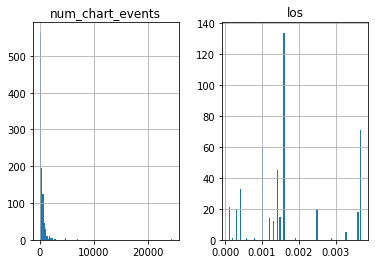

In [ ]:
caregiver_df[['num_chart_events', 'los']].hist(bins=100)

In [2]:
from os import listdir
from os.path import isfile, join

mypath = 'dataset_artifacts'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
print(onlyfiles)

['mdp_patient_2083.json', 'mdp_patient_3537.json', 'mdp_patient_5320.json', 'mdp_patient_1702.json', 'mdp_patient_917.json', 'mdp_patient_850.json', 'mdp_patient_1695.json', 'mdp_patient_5090.json', 'mdp_patient_2775.json', 'mdp_patient_4574.json', 'mdp_patient_3974.json', 'mdp_patient_766.json', 'mdp_patient_5304.json', 'mdp_patient_1182.json', 'mdp_patient_4120.json', 'mdp_patient_1032.json', 'mdp_patient_3370.json', 'mdp_patient_2211.json', 'mdp_patient_3336.json', 'mdp_patient_2139.json', 'mdp_patient_1356.json', 'mdp_patient_2013.json', 'mdp_patient_3119.json', 'mdp_patient_4777.json', 'mdp_patient_4645.json', 'mdp_patient_4408.json', 'mdp_patient_3828.json', 'mdp_patient_4294.json', 'mdp_patient_2005.json', 'mdp_patient_2804.json', 'mdp_patient_3665.json', 'mdp_patient_4621.json', 'mdp_patient_4595.json', 'mdp_patient_2183.json', 'mdp_patient_4254.json', 'mdp_patient_1559.json', 'mdp_patient_3080.json', 'mdp_patient_2554.json', 'mdp_patient_3014.json', 'mdp_patient_2931.json', 'm

In [14]:
import json
mdp_patients = {}
patients = {}
for patient_file in onlyfiles:
    if "mdp_patient" in patient_file:
        with open('dataset_artifacts/' + patient_file) as f:
            patient = json.load(f)
        mdp_patients[patient_file[4:].split('.')[0]] = patient
    
    if "mdp_patient" in patient_file:
        with open('dataset_json/' + patient_file[4:]) as g:
            patient = json.load(g)
        patients[patient_file[4:].split('.')[0]] = patient

In [15]:
patient_names = list(patients.keys())

print(patient_names)

['patient_2083', 'patient_3537', 'patient_5320', 'patient_1702', 'patient_917', 'patient_850', 'patient_1695', 'patient_5090', 'patient_2775', 'patient_4574', 'patient_3974', 'patient_766', 'patient_5304', 'patient_1182', 'patient_4120', 'patient_1032', 'patient_3370', 'patient_2211', 'patient_3336', 'patient_2139', 'patient_1356', 'patient_2013', 'patient_3119', 'patient_4777', 'patient_4645', 'patient_4408', 'patient_3828', 'patient_4294', 'patient_2005', 'patient_2804', 'patient_3665', 'patient_4621', 'patient_4595', 'patient_2183', 'patient_4254', 'patient_1559', 'patient_3080', 'patient_2554', 'patient_3014', 'patient_2931', 'patient_5033', 'patient_1629', 'patient_4529', 'patient_787', 'patient_3176', 'patient_996', 'patient_1789', 'patient_617', 'patient_5154', 'patient_3053', 'patient_2166', 'patient_1099', 'patient_3610', 'patient_3977', 'patient_1362', 'patient_5167', 'patient_2909', 'patient_304', 'patient_2379', 'patient_296', 'patient_1161', 'patient_2692', 'patient_3107',

In [17]:
print(len(mdp_patients[patient_names[0]]['actions']))
print(len(mdp_patients[patient_names[0]]['rewards']))
print(len(mdp_patients[patient_names[0]]['trajectory']))
print(patients[patient_names[0]]['mortality'])

69
69
70
False


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
train_indices, test_indices = train_test_split(list(range(len(patient_names))), test_size=0.0)
train_patient_names = [patient_names[i] for i in train_indices]
test_patient_names = [patient_names[i] for i in test_indices]

ValueError: test_size=0.0 should be either positive and smaller than the number of samples 5366 or a float in the (0, 1) range

In [26]:
out_filename = 'train_state_action_information.csv'

with open(out_filename, 'w') as out_file:
    out_file.write('patient,s,a,r,sp,mortality\n')
    for patient_name in patient_names:
        print(patient_name)
        actions = mdp_patients[patient_name]['actions']
        rewards = mdp_patients[patient_name]['rewards']
        states = mdp_patients[patient_name]['trajectory']
        mortality = patients[patient_name]['mortality']
        
        for i in range(len(states)-1):
            parsed_line = patient_name + ',' + str(states[i]) + ',' + str(actions[i]) + ',' + str(rewards[i]) + ',' + str(states[i+1]) + ',' + str(mortality) + '\n'
            out_file.write(parsed_line)
out_file.close()

patient_2083
patient_3537
patient_5320
patient_1702
patient_917
patient_850
patient_1695
patient_5090
patient_2775
patient_4574
patient_3974
patient_766
patient_5304
patient_1182
patient_4120
patient_1032
patient_3370
patient_2211
patient_3336
patient_2139
patient_1356
patient_2013
patient_3119
patient_4777
patient_4645
patient_4408
patient_3828
patient_4294
patient_2005
patient_2804
patient_3665
patient_4621
patient_4595
patient_2183
patient_4254
patient_1559
patient_3080
patient_2554
patient_3014
patient_2931
patient_5033
patient_1629
patient_4529
patient_787
patient_3176
patient_996
patient_1789
patient_617
patient_5154
patient_3053
patient_2166
patient_1099
patient_3610
patient_3977
patient_1362
patient_5167
patient_2909
patient_304
patient_2379
patient_296
patient_1161
patient_2692
patient_3107
patient_2397
patient_2993
patient_3535
patient_3302
patient_2878
patient_5108
patient_2790
patient_3891
patient_2
patient_1425
patient_1992
patient_4429
patient_2096
patient_1968
patient_30

patient_4380
patient_1397
patient_411
patient_1022
patient_3406
patient_5155
patient_888
patient_487
patient_2512
patient_1780
patient_2073
patient_3934
patient_2240
patient_2135
patient_1035
patient_306
patient_2370
patient_4668
patient_4692
patient_3861
patient_82
patient_4917
patient_1283
patient_5344
patient_2976
patient_1131
patient_2582
patient_992
patient_4100
patient_1267
patient_2741
patient_4840
patient_3509
patient_2683
patient_127
patient_3430
patient_1849
patient_2522
patient_341
patient_2270
patient_1340
patient_1103
patient_2311
patient_3763
patient_4670
patient_1668
patient_4138
patient_140
patient_3502
patient_5255
patient_2575
patient_486
patient_3408
patient_4457
patient_5353
patient_4701
patient_1246
patient_2599
patient_715
patient_1917
patient_4675
patient_1882
patient_4968
patient_2283
patient_2780
patient_2744
patient_3601
patient_410
patient_266
patient_525
patient_2776
patient_5229
patient_5170
patient_1323
patient_3299
patient_4611
patient_2714
patient_4057
p

patient_3857
patient_322
patient_4274
patient_2851
patient_5036
patient_2065
patient_1892
patient_5354
patient_3753
patient_1978
patient_1454
patient_54
patient_2734
patient_4622
patient_2598
patient_2332
patient_3680
patient_2345
patient_3470
patient_2542
patient_5122
patient_3572
patient_5024
patient_590
patient_4580
patient_2310
patient_5232
patient_3033
patient_3088
patient_560
patient_4682
patient_192
patient_1985
patient_2607
patient_2256
patient_3690
patient_4041
patient_4065
patient_4855
patient_4649
patient_4937
patient_4086
patient_2901
patient_4505
patient_4135
patient_1997
patient_2385
patient_3505
patient_2161
patient_4385
patient_3879
patient_3485
patient_3773
patient_2949
patient_4836
patient_533
patient_3082
patient_4738
patient_3415
patient_771
patient_756
patient_2420
patient_2280
patient_3300
patient_749
patient_1211
patient_1666
patient_5360
patient_1057
patient_3156
patient_3293
patient_4264
patient_4879
patient_1828
patient_3198
patient_780
patient_646
patient_198

patient_1844
patient_3439
patient_4842
patient_3178
patient_578
patient_4758
patient_583
patient_4791
patient_2871
patient_4435
patient_1996
patient_2328
patient_2498
patient_2157
patient_66
patient_1560
patient_1873
patient_844
patient_1937
patient_1846
patient_1206
patient_1635
patient_3183
patient_4108
patient_3720
patient_3066
patient_552
patient_681
patient_651
patient_1800
patient_168
patient_4319
patient_4382
patient_4864
patient_342
patient_4074
patient_434
patient_5103
patient_414
patient_1132
patient_1556
patient_699
patient_3920
patient_4305
patient_5220
patient_540
patient_3718
patient_3078
patient_4573
patient_5331
patient_2066
patient_4193
patient_294
patient_2360
patient_5129
patient_1264
patient_1387
patient_1491
patient_2715
patient_4696
patient_4208
patient_4401
patient_5037
patient_1253
patient_4196
patient_3160
patient_1059
patient_893
patient_2126
patient_1185
patient_3215
patient_4862
patient_2731
patient_840
patient_421
patient_345
patient_412
patient_3809
patien

patient_1684
patient_2162
patient_2550
patient_4542
patient_2792
patient_3186
patient_2334
patient_1799
patient_2532
patient_548
patient_3661
patient_1208
patient_2627
patient_2986
patient_2722
patient_3562
patient_3988
patient_2558
patient_4637
patient_3967
patient_2703
patient_4275
patient_4766
patient_2841
patient_3553
patient_4830
patient_4423
patient_4848
patient_4359
patient_1552
patient_5300
patient_2860
patient_931
patient_3395
patient_1232
patient_3111
patient_2274
patient_4465
patient_3848
patient_1675
patient_1655
patient_3901
patient_2861
patient_2436
patient_4244
patient_3512
patient_2152
patient_576
patient_5126
patient_1513
patient_637
patient_4504
patient_2424
patient_2995
patient_3192
patient_4046
patient_4958
patient_910
patient_164
patient_3201
patient_1787
patient_708
patient_4410
patient_2172
patient_1540
patient_2605
patient_4240
patient_2897
patient_230
patient_3637
patient_3994
patient_3121
patient_2617
patient_4099
patient_2237
patient_3437
patient_3981
patient

In [64]:
out_filename = 'test_state_action_information.csv'

with open(out_filename, 'w') as out_file:
    out_file.write('s,a,r,sp\n')
    for patient_name in test_patient_names:
        print(patient_name)
        actions = patients[patient_name]['actions']
        rewards = patients[patient_name]['rewards']
        states = patients[patient_name]['trajectory']
        for i in range(len(states)-1):
            parsed_line =str(states[i]) + ',' + str(actions[i]) + ',' + str(rewards[i]) + ',' + str(states[i+1]) + '\n'
            out_file.write(parsed_line)
out_file.close()

mdp_patient_2871
mdp_patient_1611
mdp_patient_1772
mdp_patient_3056
mdp_patient_4088
mdp_patient_2251
mdp_patient_1440
mdp_patient_1663
mdp_patient_3620
mdp_patient_4408
mdp_patient_560
mdp_patient_4092
mdp_patient_2572
mdp_patient_4831
mdp_patient_3182
mdp_patient_745
mdp_patient_2144
mdp_patient_3908
mdp_patient_2623
mdp_patient_2112
mdp_patient_621
mdp_patient_3558
mdp_patient_5172
mdp_patient_3642
mdp_patient_1979
mdp_patient_1511
mdp_patient_940
mdp_patient_2727
mdp_patient_3010
mdp_patient_2351
mdp_patient_1038
mdp_patient_3813
mdp_patient_1607
mdp_patient_1077
mdp_patient_611
mdp_patient_1777
mdp_patient_4527
mdp_patient_4228
mdp_patient_4947
mdp_patient_615
mdp_patient_5236
mdp_patient_2654
mdp_patient_1515
mdp_patient_4274
mdp_patient_5167
mdp_patient_2174
mdp_patient_1709
mdp_patient_4197
mdp_patient_4629
mdp_patient_3168
mdp_patient_8
mdp_patient_5131
mdp_patient_3282
mdp_patient_514
mdp_patient_5075
mdp_patient_2233
mdp_patient_3224
mdp_patient_2178
mdp_patient_1985
mdp_pat

mdp_patient_3739
mdp_patient_625
mdp_patient_4999
mdp_patient_1057
mdp_patient_4589
mdp_patient_4492
mdp_patient_3634
mdp_patient_2984
mdp_patient_4576
mdp_patient_4359
mdp_patient_1407
mdp_patient_777
mdp_patient_3287
mdp_patient_1445
mdp_patient_746
mdp_patient_3866
mdp_patient_2235
mdp_patient_2636
mdp_patient_2259
mdp_patient_3271
mdp_patient_5116
mdp_patient_3657
mdp_patient_4569
mdp_patient_1340
mdp_patient_4309
mdp_patient_4451
mdp_patient_2385
mdp_patient_4041
mdp_patient_1965
mdp_patient_1705
mdp_patient_114
mdp_patient_4824
mdp_patient_2375
mdp_patient_541
mdp_patient_217
mdp_patient_3604
mdp_patient_5016
mdp_patient_3129
mdp_patient_751
mdp_patient_1043
mdp_patient_2526
mdp_patient_1142
mdp_patient_238
mdp_patient_3218
mdp_patient_3153
mdp_patient_2110
mdp_patient_2709
mdp_patient_680
mdp_patient_941
mdp_patient_1784
mdp_patient_842
mdp_patient_4161
mdp_patient_4984
mdp_patient_3246
mdp_patient_707
mdp_patient_1530
mdp_patient_493
mdp_patient_895
mdp_patient_4670
mdp_patient